# Importar bibliotecas

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Juntar imagens

### Carregar imagens

In [2]:
pinguin_1 = Image.open('P1.png')
pinguin_2 = Image.open('P2.png')
pinguin_3 = Image.open('P3.jpg')
pinguin_4 = Image.open('P4.png')

### Realizar a junção

In [3]:
largura_total = pinguin_1.width + pinguin_2.width + pinguin_3.width + pinguin_4.width
altura_max = max(pinguin_1.height, pinguin_2.height, pinguin_3.height, pinguin_4.height)

pinguins_juntos = Image.new('RGB', (largura_total, altura_max))
pinguins_juntos.paste(pinguin_1, (0, 0))
pinguins_juntos.paste(pinguin_2, (pinguin_1.width, 0))
pinguins_juntos.paste(pinguin_3, (pinguin_1.width + pinguin_2.width, 0))
pinguins_juntos.paste(pinguin_4, (pinguin_1.width + pinguin_2.width + pinguin_3.width, 0))

### Plotar a nova imagem

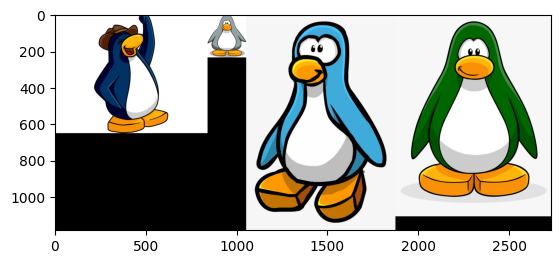

In [4]:
plt.imshow(pinguins_juntos)

### Salvar imagem

In [5]:
pinguins_juntos.save('pinguins_juntos.png')

# 2. Trocar as cores

### Carregar imagem

In [22]:
pinguins_juntos = Image.open('pinguins_juntos.png')

### Settando as cores usadas

In [17]:
azul_escuro = {
    "luz":np.array([40, 90, 141]),
    "padrao":np.array([0,50,101]),
    "sombra": np.array([0, 0, 51])
}

cinza = {
    "luz": np.array([174, 184, 187]),
    "padrao": np.array([147, 160, 164]),
    "sombra": np.array([88, 96, 98])
}

azul_claro = {
    "luz": np.array([72, 199, 254]),
    "padrao": np.array([63, 171, 218]),
    "sombra": np.array([45, 130, 167])
}

verde = {
    "luz": np.array([64,140,64]),
    "padrao": np.array([0, 102, 0]),
    "sombra": np.array([0, 82, 0]),
}

### Função para trocar as cores
- arr: array para realizar a troca
- cor_velha: cor a ser trocada
- cor_nova: cor a ser usada

In [18]:
def troca_cor(arr_base, arr_novo, cor_velha: dict, cor_nova: dict):

    for k in ["luz", "padrao", "sombra"]:
        cor_v_arr = np.array(cor_velha[k])
        cor_n_arr = np.array(cor_nova[k])
        
        mask = np.all(arr_base == cor_v_arr, axis=-1)
        arr_novo[mask] = cor_n_arr
    


### Trocar as cores

In [34]:
pinguins_juntos_arr = np.array(pinguins_juntos)

pinguins_troca_cor_arr = np.copy(pinguins_juntos_arr)

troca_cor(pinguins_juntos_arr,pinguins_troca_cor_arr, azul_escuro, cinza)
troca_cor(pinguins_juntos_arr,pinguins_troca_cor_arr, cinza, azul_claro)
troca_cor(pinguins_juntos_arr,pinguins_troca_cor_arr, azul_claro, verde)
troca_cor(pinguins_juntos_arr,pinguins_troca_cor_arr, verde, azul_escuro)

### Plotar nova imagem

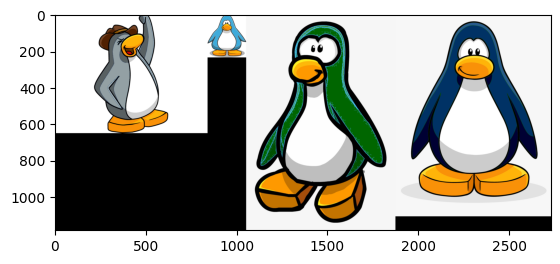

In [35]:
plt.imshow(pinguins_troca_cor_arr)

### Salvar nova imagem

In [37]:
pinguins_troca_cor = Image.fromarray(pinguins_troca_cor_arr)

pinguins_troca_cor.save('pinguins_troca_cor.png')

# 3. Aplicar o espelhamento

### Carregar imagem

In [45]:
pinguins_trocar_cor_arr = np.array(Image.open('pinguins_pb.png'))

### Inverter a imagem

In [46]:
(l, c, p) = pinguins_trocar_cor_arr.shape

pinguins_refl = np.zeros(shape=pinguins_trocar_cor_arr.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        pinguins_refl[new_y, new_x] = pinguins_trocar_cor_arr[i, j]

### Plotar a imagem

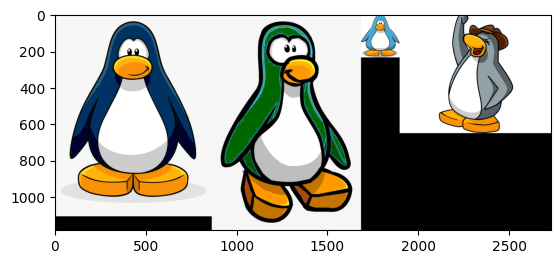

In [47]:
plt.imshow(pinguins_refl)

### Salvar nova imagem

In [48]:
pinguins_refl = Image.fromarray(pinguins_refl)

pinguins_refl.save('pinguins_refl.png')

# 4. Recortar o pinguim favorito

### Carregar imagem

In [56]:
pinguins_refl = Image.open('pinguins_refl.png')

### Cortar pinguin

In [102]:
pinguins_refl_arr = np.array(pinguins_refl)

dx, dy = (35, 25)
_, _, p = pinguins_refl_arr.shape

pinguin_end_x, pinguin_end_y = 820, 1010

pinguin_cortado = np.zeros(shape=(pinguin_end_y, pinguin_end_x, p), dtype=np.uint8)

for i in range(pinguin_end_y):
    for j in range(pinguin_end_x):
        new_x = j
        new_y = i
        pinguin_cortado[new_y, new_x ] = pinguins_refl_arr[i + dx, j + dy]

### Plotar imagem

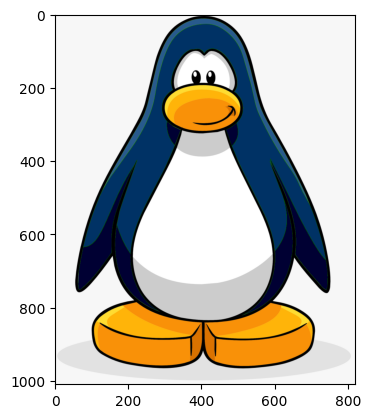

In [103]:
plt.imshow(pinguin_cortado)

### Salvar imagem

In [104]:
pinguin_cortado = Image.fromarray(pinguin_cortado)

pinguin_cortado.save("pinguin_cortado.png")

# 5. Fazer a analise do histograma

In [112]:
pinguin_cortado_arr = np.array(Image.open('pinguin_cortado.png'))

In [113]:
def histogram_gray(img_arr):
    (l, c) = img_arr.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img_arr[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram


def show_histogram(img_arr):
    histogram_r = histogram_gray(img_arr[:, :, 0])
    histogram_g = histogram_gray(img_arr[:, :, 1])
    histogram_b = histogram_gray(img_arr[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

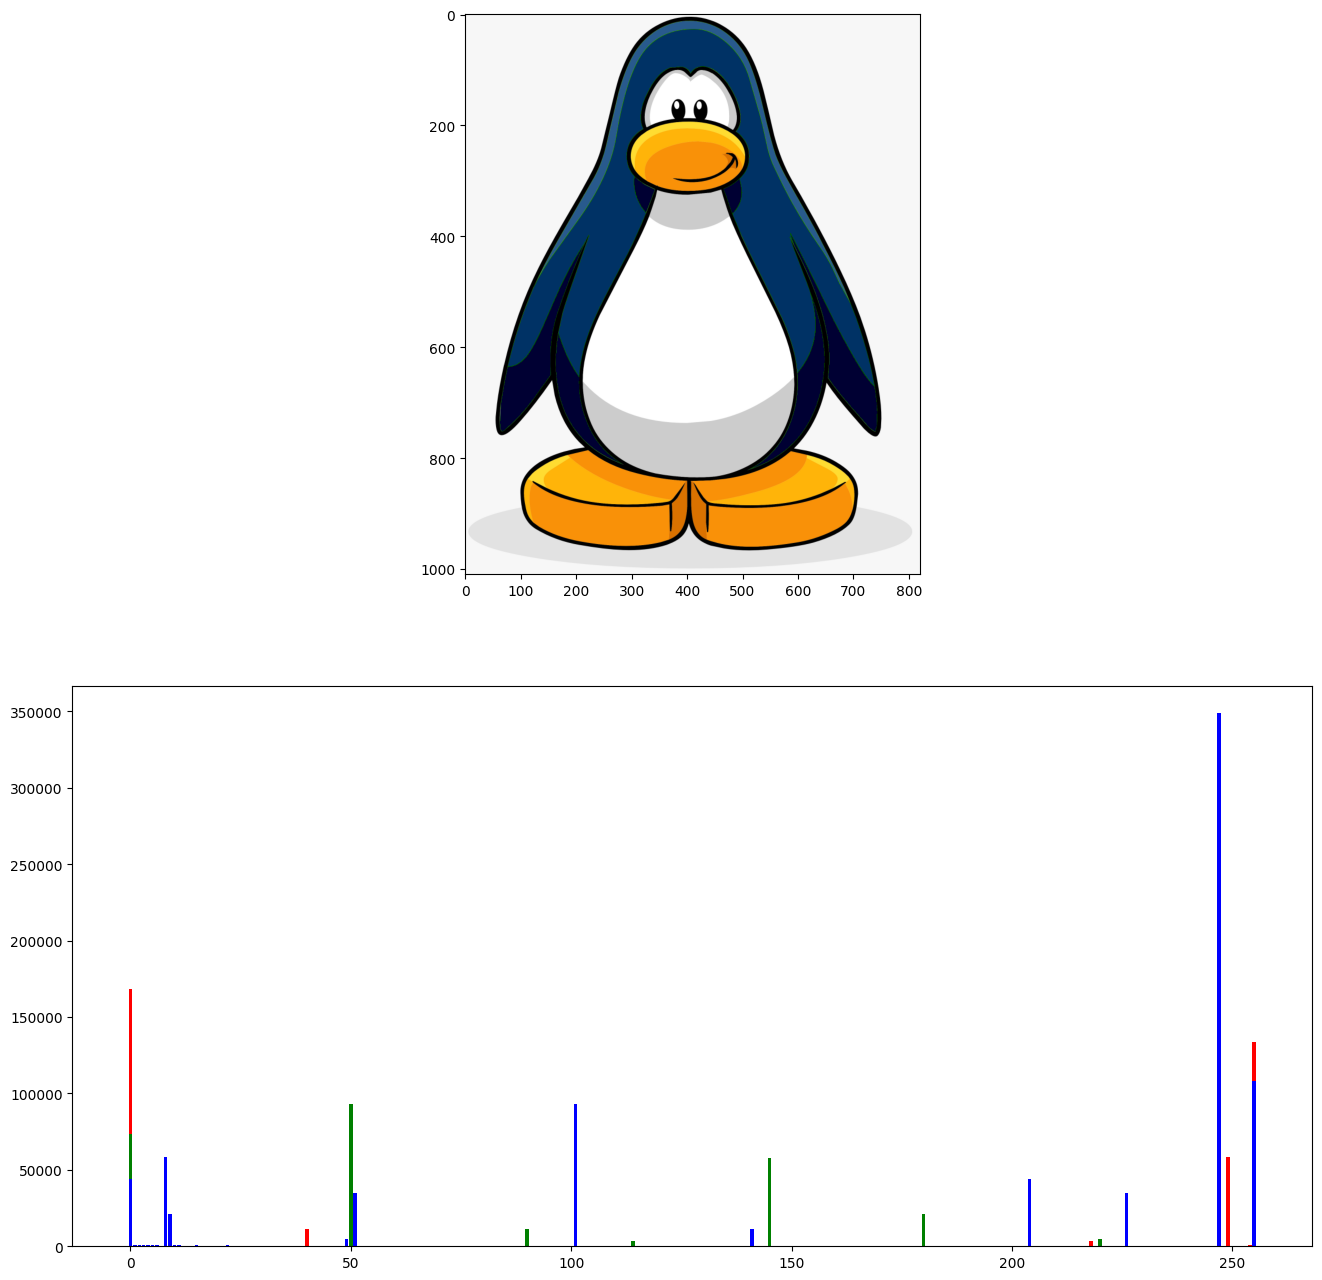

In [114]:
show_histogram(pinguin_cortado_arr)